# Using a Classification Model to Predict the Position of Footballers

# DSCI 100 009 - Group 170

In [1]:
set.seed(1234)

# Introduction

Football is the world’s most popular form of sport, being played in every nation without exception and having over 3.5 billion fans worldwide. Digital transformation is one of the significant challenges of our time (Bounfour, 2016; Castells, 1996). On a smaller scale, this also affects the world of sports, especially soccer. The game's competitive nature makes many clubs use data science to get ahead of the competition. With the majestic opening of the World Cup in Qatar, Canadian football has seen a rise in attention and inspired our group to investigate the Canadian Premier League.

The development of young players is crucial for any football team. However, due to their young age, they often try out various positions before choosing their favorite, and their choice may not be best suited to them. Therefore, we plan to create a predictive model that can determine the most likely position of a player based on their player statistics.  Our project used K-NN classification to find the most suitable positions for each player. In this project, we will divide the player positions into three categories: forward, midfielder and defender. We will identify the most significant statistics in identifying the player's position and construct a model that determines the most appropriate position for each player.

For this project, we will use the Canadian Premier League Centre Circle (CPLCC) dataset compiled by Stats Perform (Cooper A, 2019). CPLCC contains the performance statistics of Canadian Premier League players starting from 2019 until 2021, like goals, assists, and red cards. The recorded content in this dataset is very detailed, and not all of these data points were useful for our investigation. However, we can create a more accurate position prediction model by picking the few key identifiers that varied the most across the three positions to focus on.

# Methods

Firstly, we downloaded the Canadian Premier League Centre Circle (CPLCC) from GitHub to observe player statistics from the 2019 season until the 2021 season. Next, we extract only the columns needed for this project. For example, we are looking for predictors such as goals, assists, and red cards. We then combined our dataset from 2019-2021. Next, we removed N/A data, players with no minutes played, and the goalkeeper. We removed the goalkeeper since they have their statistics associated with them and would not fit our position categorization. We then want to simplify our player position columns only to contain three categories: defender, forward, and midfielder. For example, positions such as center forward and left winger will be categorized as a forward. Since players have different minutes played, we create new columns containing data per minute. We must create columns that contain each data per match to make an equivalent comparison for each row. We time it by 90 since each match is 90 minutes long. To begin to set up our $k$-nn classifier model, we split the dataset into testing and training. 75% of the data will be training, and 25% will be testing. Next, we found the mean value for each player's position to get the value per match. We then create a bar plot to visualize our predictors' proportions in each position (forward, midfielder, defender).

From our analysis, we decide to narrow down our predictors to avoid the curse of dimensionality. Having too many predictors will be hard to deal with multidimensional data. To decide which predictors we will choose, we see which are most important. The most important predictors have the highest ratio in the bar chart. For example, TimesCaughtOffside_per_Match is done by 77% forward position. We took the bar plot's top 8 predictors, with one position dominating more than 50%.  

Using the top 8 predictors that showed the most important, we performed the $k$-nn classification on our training set. Next, we continue to create our $k$-nn classification model. We create our recipe using our training data. We set our neighbors to tune to find the optimal number of neighbors to use. Next, we make sure to conduct cross-validation. After that, we make a workflow to collect metrics and find the accuracy for each amount of neighbors used. We create a line graph to visualize the accuracy of each neighbor.

Our graph shows that the best number of neighbors to use is 1. Finally, we create our model using the best $k$-value. We repeat the same steps above by creating the recipe, still using the training data. We use knn_spec, but this time we set our neighbors to 1. Next, we create the workflow and make predictions to find our accurate estimate. However, we use our testing data when making predictions. We also create a confusion matrix to visualize our models' correct and inaccurate labels. Our model has an accuracy of 0.85, which is considered a good model. The confusion matrix shows that our model mostly makes accurate classifications. 


## Import Library

In [2]:
library(readr)
library(tidyverse)
library(dplyr)
library(RCurl)
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(caret)
install.packages("mlbench")
install.packages("themis")
library(mlbench)
library(themis)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ dplyr   1.0.9
✔ tibble  3.1.7     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ wor

## Loading Dataset

In [3]:
data_2019 <- read_csv("https://raw.githubusercontent.com/Ryo-N7/CanPL_Analysis/main/data/CPLPlayerTotals2019.csv")
data_2020 <- read_csv("https://raw.githubusercontent.com/Ryo-N7/CanPL_Analysis/main/data/CPLPlayerTotals2020.csv")
data_2021 <- read_csv("https://raw.githubusercontent.com/Ryo-N7/CanPL_Analysis/main/data/CPLPlayerTotals2021.csv")

New names:
• `DefTouchD3` -> `DefTouchD3...134`
• `DefTouchD3` -> `DefTouchD3...135`
• `OpenPlayxG` -> `OpenPlayxG...138`
• `SetPiecexG` -> `SetPiecexG...139`
• `OpenPlayxG` -> `OpenPlayxG...140`
• `SetPiecexG` -> `SetPiecexG...141`
• `PassesIntoBox` -> `PassesIntoBox...152`
• `ConcededPassesIntoBox` -> `ConcededPassesIntoBox...153`
• `PassesIntoBox` -> `PassesIntoBox...154`
• `ConcededPassesIntoBox` -> `ConcededPassesIntoBox...155`
Rows: 172 Columns: 156
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (22): playerId, Player, playerFullName, pos, teamName, teamShortName, t...
dbl (133): Rank, playerImageId, teamImageId, optaPersonId, optaTeamId, GM, M...
lgl   (1): null

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `DefTouchD3` -> `DefTouchD3...134`
• `DefTouchD3` -> `DefTouchD3...135`
• `OpenPlayxG` -> `OpenPlayx

## Extracting only the columns that we need for this project

In [4]:
selected_2019 <- select(data_2019, pos,
                   Min, 
                   ShotsTotal, 
                   Goal, 
                   Ast, 
                   Red, 
                   Yellow, 
                   KeyPasses,
                   ThrghBalls,
                   Offsides,
                   Turnover, 
                   DefTouch,
                   Int,
                   Clrnce, 
                   Recovery,
                   SucflTkls) 

selected_2020 <- select(data_2020, pos,
                   Min, 
                   ShotsTotal, 
                   Goal, 
                   Ast, 
                   Red, 
                   Yellow, 
                   KeyPasses,
                   ThrghBalls,
                   Offsides,
                   Turnover, 
                   DefTouch,
                   Int,
                   Clrnce, 
                   Recovery,
                   SucflTkls) 

selected_2021 <- select(data_2021, pos,
                   Min, 
                   ShotsTotal, 
                   Goal, 
                   Ast, 
                   Red, 
                   Yellow, 
                   KeyPasses,
                   ThrghBalls,
                   Offsides,
                   Turnover, 
                   DefTouch,
                   Int,
                   Clrnce, 
                   Recovery,
                   SucflTkls) 

## Combining All Data Set We Have From 2019, 2020 and 2021 Season

In [5]:
combined_data <- rbind(selected_2019, selected_2020, selected_2021)

## Renaming the column names with labels that are more understandable for public audience

In [6]:
colnames(combined_data) <- c("PlayerPosition",  
                                 "MinutesPlayed", 
                                 "TotalShots",
                                 "Goals",
                                 "Assists",
                                 "StraightRedCards",
                                 "FirstYellowCard",
                                 "KeyPassesAttempted",
                                 "ThroughBallsAttempted",
                                 "TimesCaughtOffside",
                                 "TotalTurnovers",
                                 "DefensiveTouches",
                                 "Interceptions",
                                 "TotalClearances",
                                 "BallRecoveries",
                                 "TacklesSuccessful")

## Removing NA data, player with no minutes played, and goalkeeper

In [7]:
combined_data <- filter(combined_data, MinutesPlayed != 0, PlayerPosition != "Goalkeeper")

## Simplifying the PlayerPosition column into only 3 category (position)

In [8]:
combined_data <- mutate(combined_data, PlayerPosition = as_factor(PlayerPosition)) %>%
                     mutate(combined_data, SimplifyPlayerPosition = case_when(
                            PlayerPosition == "Centre Forward" ~ "Forward",
                            PlayerPosition == "Centre Attacking Midfielder" ~ "Midfielder",
                            PlayerPosition == "Right Centre Back" ~ "Defender",
                            PlayerPosition == "Central Midfielder" ~ "Midfielder",
                            PlayerPosition == "Right Attacking Midfielder" ~ "Midfielder",
                            PlayerPosition == "Left Centre Back" ~ "Defender",
                            PlayerPosition == "Left Attacking Midfielder" ~ "Midfielder",
                            PlayerPosition == "Defensive Midfielder" ~ "Midfielder",
                            PlayerPosition == "Right Back" ~ "Defender",
                            PlayerPosition == "Right Midfielder" ~ "Midfielder",
                            PlayerPosition == "Left Back" ~ "Defender",
                            PlayerPosition == "Left Midfielder" ~ "Midfielder",
                            PlayerPosition == "Left Winger" ~ "Forward",
                            PlayerPosition == "Second Striker" ~ "Forward",
                            PlayerPosition == "Central Defender" ~ "Defender",
                            PlayerPosition == "Right Winger" ~ "Forward")) %>%
mutate(SimplifyPlayerPosition = as.factor(SimplifyPlayerPosition))

## Creating several new columns that contains each data per minute because each rows (players) have different minutes played that will affect all of the other data

In [9]:
combined_data <- mutate(combined_data,
                        TotalShots_per_Minute = TotalShots / MinutesPlayed,
                        Goals_per_Minute = Goals / MinutesPlayed,
                        Assists_per_Minute = Assists / MinutesPlayed,
                        StraightRedCards_per_Minute = StraightRedCards / MinutesPlayed,
                        FirstYellowCard_per_Minute = FirstYellowCard / MinutesPlayed,
                        KeyPassesAttempted_per_Minute = KeyPassesAttempted / MinutesPlayed,
                        ThroughBallsAttempted_per_Minute = ThroughBallsAttempted / MinutesPlayed,
                        TimesCaughtOffside_per_Minute = TimesCaughtOffside / MinutesPlayed,
                        TotalTurnovers_per_Minute = TotalTurnovers / MinutesPlayed,
                        DefensiveTouches_per_Minute = DefensiveTouches / MinutesPlayed,
                        Interceptions_per_Minute = Interceptions / MinutesPlayed,
                        TotalClearances_per_Minute = TotalClearances / MinutesPlayed,
                        BallRecoveries_per_Minute = BallRecoveries / MinutesPlayed,
                        TacklesSuccessful_per_Minute = TacklesSuccessful / MinutesPlayed)                        

## Creating columns that contains each data per match to make equivalent comparison for each rows

In [10]:
combined_data <- summarize(combined_data,
                           SimplifyPlayerPosition,
                           TotalShots_per_Match = TotalShots_per_Minute * 90,
                           Goals_per_Match = Goals_per_Minute * 90,
                           Assists_per_Match = Assists_per_Minute * 90,
                           StraightRedCards_per_Match = StraightRedCards_per_Minute * 90,
                           FirstYellowCard_per_Match = FirstYellowCard_per_Minute * 90,
                           KeyPassesAttempted_per_Match = KeyPassesAttempted_per_Minute * 90,
                           ThroughBallsAttempted_per_Match = ThroughBallsAttempted_per_Minute * 90,
                           TimesCaughtOffside_per_Match = TimesCaughtOffside_per_Minute * 90,
                           TotalTurnovers_per_Match = TotalTurnovers_per_Minute * 90,
                           DefensiveTouches_per_Match = DefensiveTouches_per_Minute * 90,
                           Interceptions_per_Match = Interceptions_per_Minute * 90,
                           TotalClearances_per_Match = TotalClearances_per_Minute * 90,
                           BallRecoveries_per_Match = BallRecoveries_per_Minute * 90,
                           TacklesSuccessful_per_Match = TacklesSuccessful_per_Minute * 90) 

## Splitting the data set we have to training and testing dataset

In [11]:
set.seed(1234)
soccer_recipe <- recipe(SimplifyPlayerPosition ~., data = combined_data) %>%
step_upsample(SimplifyPlayerPosition, over_ratio = 1, skip = FALSE) %>%
prep()

balance_data <- bake(soccer_recipe, combined_data)

data_split <- initial_split(balance_data, prop = 0.75, strata = SimplifyPlayerPosition)
data_train <- training(data_split)
data_test <- testing(data_split)

print("Table 1 : Training Data")
print("The table contains the training data.")
head(data_train)
print("Table 2 : Testing Data")
print("The table contains the testing data.")
head(data_test)

[1] "Table 1 : Training Data"
[1] "The table contains the training data."


TotalShots_per_Match,Goals_per_Match,Assists_per_Match,StraightRedCards_per_Match,FirstYellowCard_per_Match,KeyPassesAttempted_per_Match,ThroughBallsAttempted_per_Match,TimesCaughtOffside_per_Match,TotalTurnovers_per_Match,DefensiveTouches_per_Match,Interceptions_per_Match,TotalClearances_per_Match,BallRecoveries_per_Match,TacklesSuccessful_per_Match,SimplifyPlayerPosition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.3529412,0.05882353,0.05882353,0,0.1176471,0.17647059,0.0000000,0.05882353,0.0000000,9.764706,1.411765,5.882353,5.352941,1.7058824,Defender
0.3587699,0.00000000,0.00000000,0,0.2050114,0.05125285,0.0000000,0.00000000,0.0000000,5.689066,1.588838,3.177677,3.023918,0.3587699,Defender
0.9836066,0.04918033,0.00000000,0,0.1967213,0.73770492,0.1967213,0.14754098,0.1967213,6.491803,1.770492,1.573770,6.786885,1.6229508,Defender
0.2857143,0.00000000,0.00000000,0,0.0952381,0.09523810,0.0000000,0.00000000,0.1904762,5.904762,1.428571,3.714286,3.523810,0.2857143,Defender
0.0000000,0.00000000,0.00000000,0,0.0000000,0.85714286,0.0000000,0.00000000,0.0000000,4.142857,1.714286,1.428571,5.000000,0.5714286,Defender
0.5913272,0.00000000,0.11826544,0,0.3547963,1.06438896,0.0000000,0.00000000,0.2365309,7.214192,1.300920,1.773982,5.440210,2.1287779,Defender


[1] "Table 2 : Testing Data"
[1] "The table contains the testing data."


TotalShots_per_Match,Goals_per_Match,Assists_per_Match,StraightRedCards_per_Match,FirstYellowCard_per_Match,KeyPassesAttempted_per_Match,ThroughBallsAttempted_per_Match,TimesCaughtOffside_per_Match,TotalTurnovers_per_Match,DefensiveTouches_per_Match,Interceptions_per_Match,TotalClearances_per_Match,BallRecoveries_per_Match,TacklesSuccessful_per_Match,SimplifyPlayerPosition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.4809619,0.0,0,0,0.3607214,0.06012024,0.0,0.00000000,0,6.192385,0.8416834,4.268537,3.727455,0.7214429,Defender
0.0000000,0.0,0,0,0.3797468,0.75949367,0.0,0.00000000,0,6.455696,1.8987342,1.898734,7.215190,1.1392405,Defender
0.0000000,0.0,0,0,0.5056180,0.25280899,0.0,0.00000000,0,8.848315,2.5280899,1.769663,6.825843,2.7808989,Defender
0.1537585,0.0,0,0,0.2050114,0.00000000,0.0,0.05125285,0,7.072893,1.2300683,4.715262,4.715262,0.6662870,Defender
0.9000000,0.1,0,0,0.0000000,0.40000000,0.1,0.00000000,0,4.700000,0.8000000,2.100000,4.800000,1.2000000,Defender
0.3587699,0.0,0,0,0.2050114,0.05125285,0.0,0.00000000,0,5.689066,1.5888383,3.177677,3.023918,0.3587699,Defender


## Find the mean of value for each player position to get the value per match (90 minutes)

In [12]:
data_train_mutated <- data_train %>%
group_by(SimplifyPlayerPosition) %>%
summarize(TotalShots_per_Match = mean(TotalShots_per_Match),
         Goals_per_Match = mean(Goals_per_Match),
         Assists_per_Match = mean(Assists_per_Match),
         StraightRedCards_per_Match = mean(StraightRedCards_per_Match),
         FirstYellowCard_per_Match = mean(FirstYellowCard_per_Match),
         KeyPassesAttempted_per_Match = mean(KeyPassesAttempted_per_Match),
         ThroughBallsAttempted_per_Match = mean(ThroughBallsAttempted_per_Match),
         TimesCaughtOffside_per_Match = mean(TimesCaughtOffside_per_Match),
         TotalTurnovers_per_Match = mean(TotalTurnovers_per_Match),
         DefensiveTouches_per_Match = mean(DefensiveTouches_per_Match),
         Interceptions_per_Match = mean(Interceptions_per_Match),
         TotalClearances_per_Match = mean(TotalClearances_per_Match),
         BallRecoveries_per_Match = mean(BallRecoveries_per_Match),
         TacklesSuccessful_per_Match = mean(TacklesSuccessful_per_Match)) %>%
pivot_longer(cols = TotalShots_per_Match:TacklesSuccessful_per_Match,
             names_to = "data",
             values_to = "value") %>%
group_by(data) %>%
mutate(ratio1=scales::percent(value/sum(value))) %>%
mutate(ratio2=(value/sum(value)) * 100) %>%
arrange(data, match(SimplifyPlayerPosition, c("Forward", "Midfielder", "Defender")))


print("Table 3 : Mutated Training Data")
print("The table contains the wrangled data. Each predictor shows the ratio percentage composition for the forward, defender, and midfielder positions.")
data_train_mutated

[1] "Table 3 : Mutated Training Data"
[1] "The table contains the wrangled data. Each predictor shows the ratio percentage composition for the forward, defender, and midfielder positions."


SimplifyPlayerPosition,data,value,ratio1,ratio2
<fct>,<chr>,<dbl>,<chr>,<dbl>
Forward,Assists_per_Match,0.104492353,46.8%,46.787692
Midfielder,Assists_per_Match,0.088600661,39.7%,39.671998
Defender,Assists_per_Match,0.030239979,13.5%,13.540310
Forward,BallRecoveries_per_Match,3.445263437,24.7%,24.692186
Midfielder,BallRecoveries_per_Match,5.501801373,39.4%,39.431383
Defender,BallRecoveries_per_Match,5.005784202,35.9%,35.876431
Forward,DefensiveTouches_per_Match,2.105679981,17%,16.733002
Midfielder,DefensiveTouches_per_Match,3.854571628,31%,30.630749
Defender,DefensiveTouches_per_Match,6.623742293,53%,52.636248


## Visualizing the Bar Plot

[1] "Figure 1 : Visualization of the Predictors Significance"
[1] "The bar graph contains the proportion of each category (player position) for each predictor. Predictors appear on the y-axis, and player positions are displayed in color on the bars."


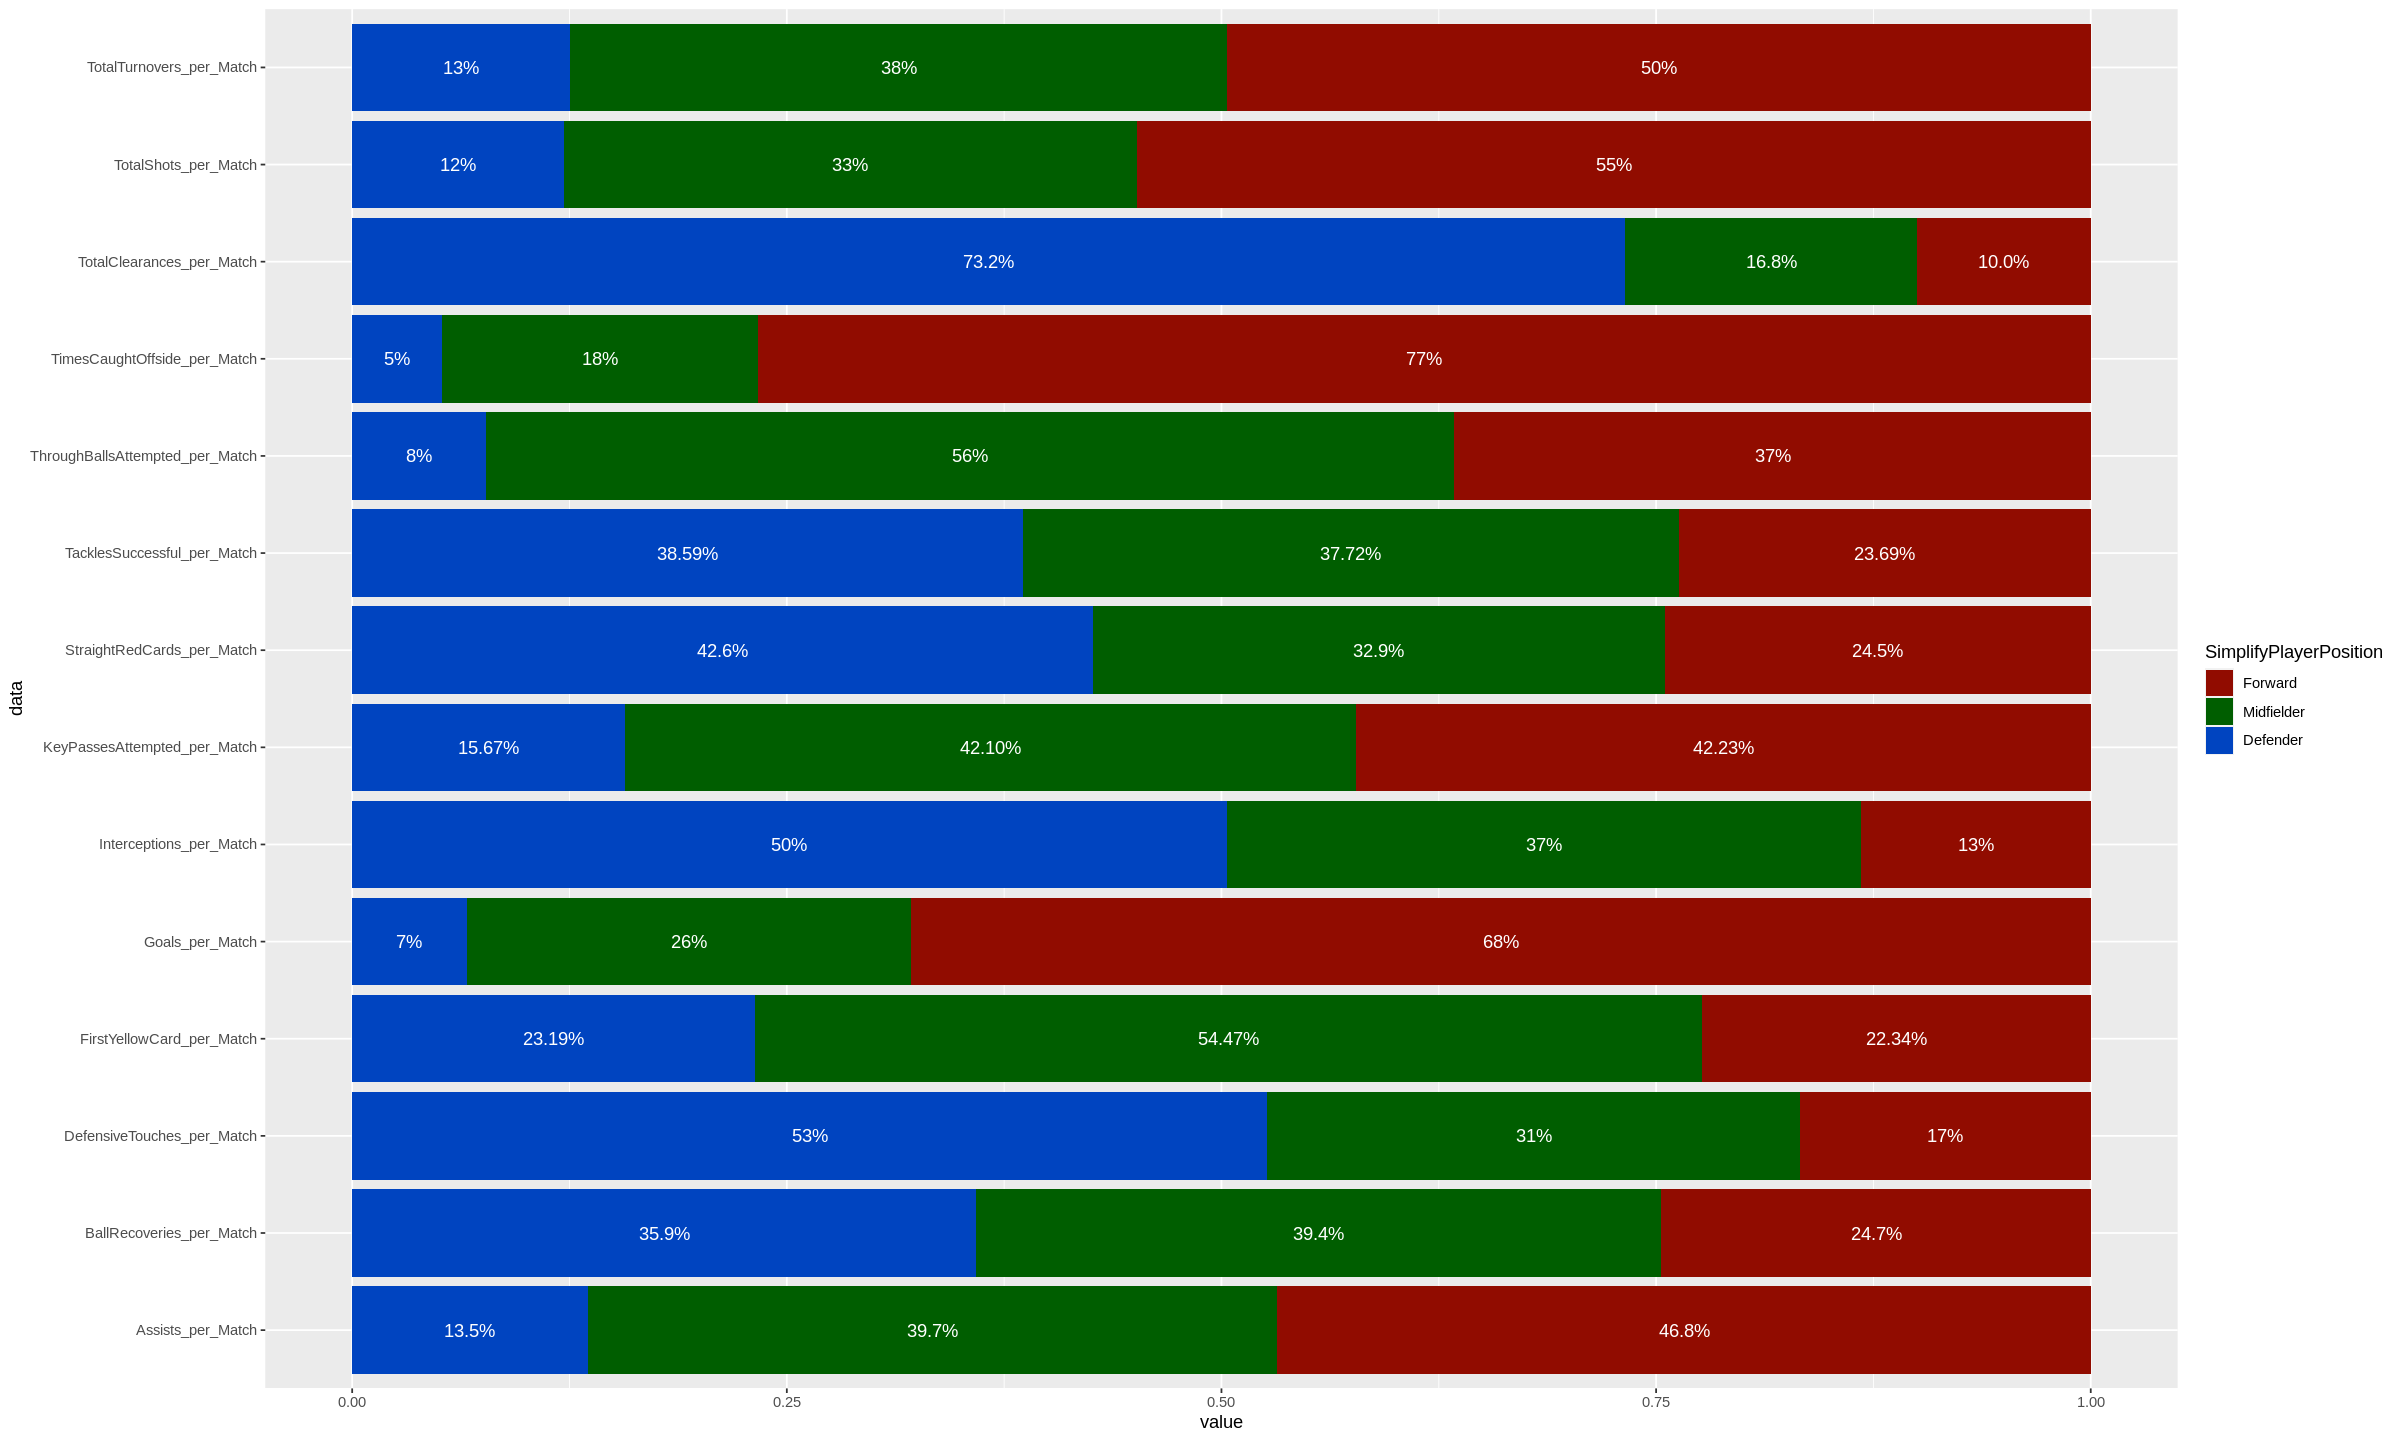

In [13]:
visual_plot <- data_train_mutated %>%
mutate(SimplifyPlayerPosition = factor(SimplifyPlayerPosition, levels = c("Forward", "Midfielder", "Defender"))) %>%
ggplot(aes(x=data, y = value, fill=SimplifyPlayerPosition)) +
geom_bar(position = "fill", stat = "identity") +
geom_text(aes(y=value, label=ratio1),
          position=position_fill(vjust=0.5), colour = "white") +
scale_fill_hue(l=30) +
coord_flip()


options(repr.plot.width=20, repr.plot.height=12)


print("Figure 1 : Visualization of the Predictors Significance")
print("The bar graph contains the proportion of each category (player position) for each predictor. Predictors appear on the y-axis, and player positions are displayed in color on the bars.")

visual_plot

## Selecting Top 8 Most Important Predictors that Have More Than 50% Influence on Position

In [14]:
print("Table 4 : Selector for 8 Most Important Predictors")
print("The table contains the top 8 predictors, with one position dominating more than 50%.")

data_train_mutated %>%
group_by(data) %>%
arrange(desc(ratio2)) %>%
filter(ratio2 > 50) 

[1] "Table 4 : Selector for 8 Most Important Predictors"
[1] "The table contains the top 8 predictors, with one position dominating more than 50%."


SimplifyPlayerPosition,data,value,ratio1,ratio2
<fct>,<chr>,<dbl>,<chr>,<dbl>
Forward,TimesCaughtOffside_per_Match,0.58935732,77%,76.67839
Defender,TotalClearances_per_Match,2.91936635,73.2%,73.23373
Forward,Goals_per_Match,0.31219785,68%,67.87218
Midfielder,ThroughBallsAttempted_per_Match,0.09640789,56%,55.68752
Forward,TotalShots_per_Match,2.21904016,55%,54.87888
Midfielder,FirstYellowCard_per_Match,0.40235244,54.47%,54.47206
Defender,DefensiveTouches_per_Match,6.62374229,53%,52.63625
Defender,Interceptions_per_Match,1.43555688,50%,50.29789


In [15]:
data_train <- data_train %>%
select(SimplifyPlayerPosition, 
       TimesCaughtOffside_per_Match,
       TotalClearances_per_Match,
       Goals_per_Match,
       ThroughBallsAttempted_per_Match,
       TotalShots_per_Match,
       FirstYellowCard_per_Match,
       DefensiveTouches_per_Match,
       Interceptions_per_Match)

## Tuning the Classifier (Cross-Validation & Parameter $k$-value Selection)

! Fold1: preprocessor 1/1, model 1/1 (predictions): Unknown columns: `(Intercept)`

! Fold2: preprocessor 1/1, model 1/1 (predictions): Unknown columns: `(Intercept)`

! Fold3: preprocessor 1/1, model 1/1 (predictions): Unknown columns: `(Intercept)`

! Fold4: preprocessor 1/1, model 1/1 (predictions): Unknown columns: `(Intercept)`

! Fold5: preprocessor 1/1, model 1/1 (predictions): Unknown columns: `(Intercept)`



[1] "Table 5 : Accuracy Estimation for Each Different Neighbors"
[1] "The table contains the accuracy of different neighbors."


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8396316,5,0.015353586,Preprocessor1_Model01
21,accuracy,multiclass,0.8394534,5,0.012415528,Preprocessor1_Model05
11,accuracy,multiclass,0.8392751,5,0.009972621,Preprocessor1_Model03
16,accuracy,multiclass,0.8334522,5,0.014019809,Preprocessor1_Model04
26,accuracy,multiclass,0.8235888,5,0.013101032,Preprocessor1_Model06
6,accuracy,multiclass,0.8216875,5,0.020282337,Preprocessor1_Model02
31,accuracy,multiclass,0.8156863,5,0.012021114,Preprocessor1_Model07
41,accuracy,multiclass,0.8136067,5,0.014850148,Preprocessor1_Model09
36,accuracy,multiclass,0.8096257,5,0.010967920,Preprocessor1_Model08


[1] "Figure 2 : Cross Validation Plot"
[1] "Line graph that displays the accuracy estimate for each amount of neighbors used. Neighbors are on the x-axis, and accurate estimates are on the y-axis."


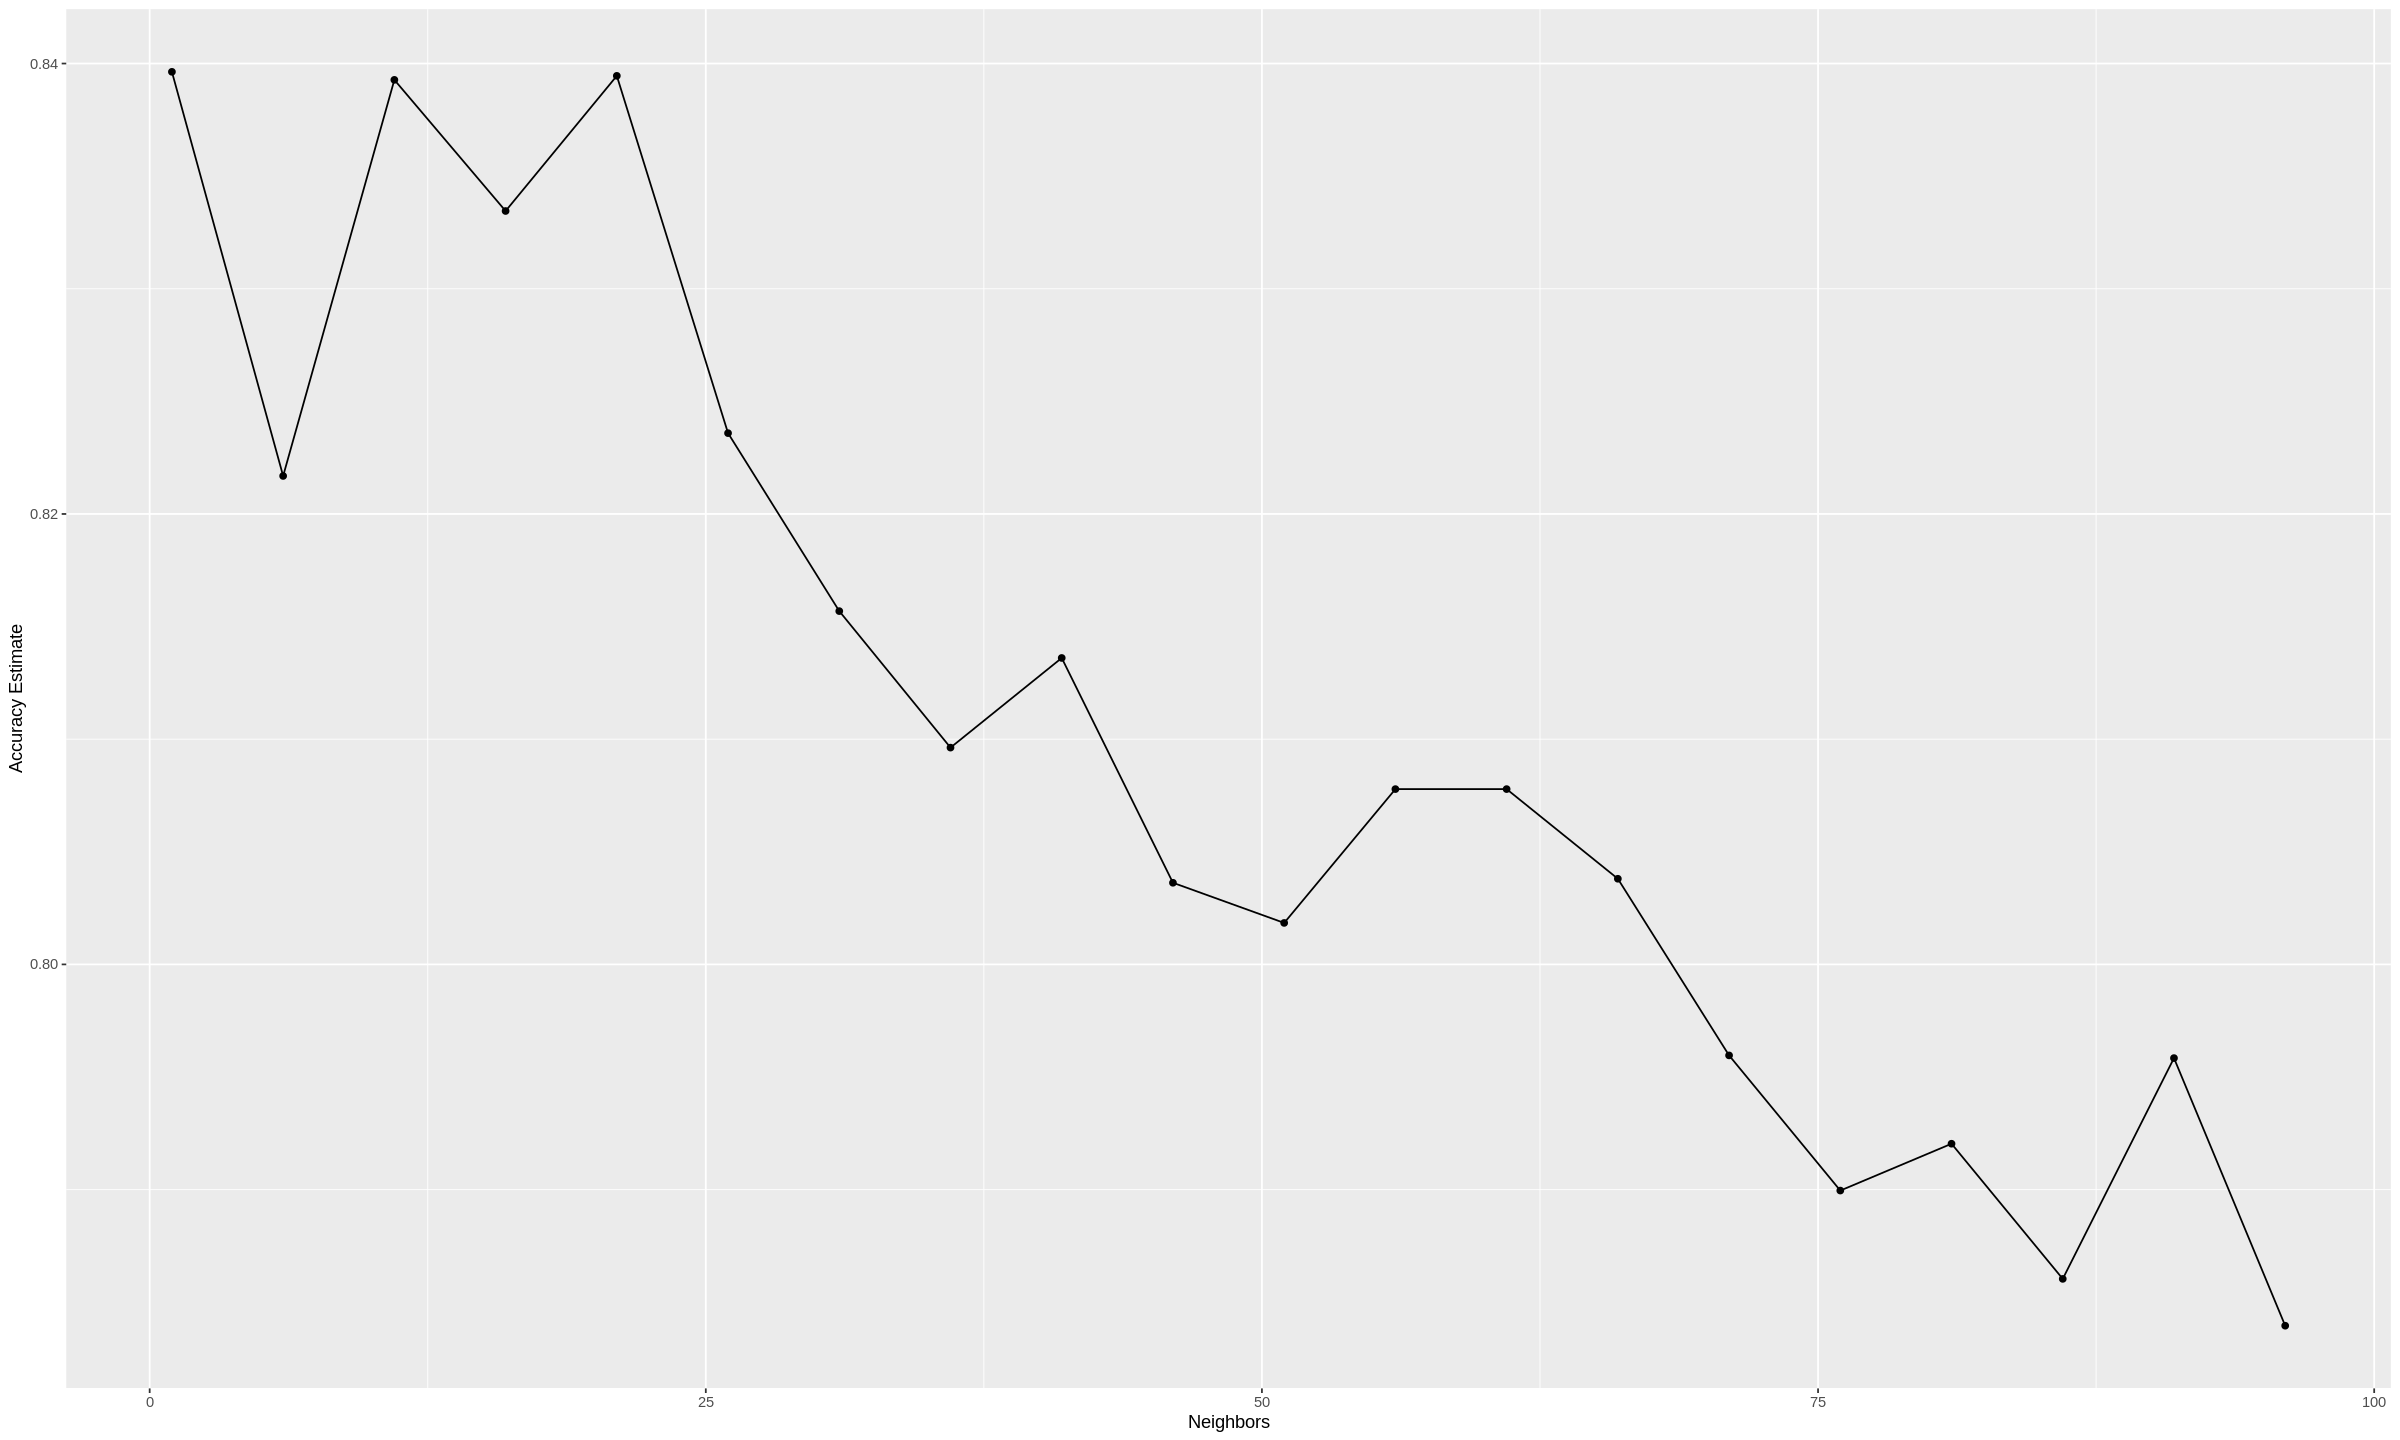

In [16]:
set.seed(1234)
soccer_recipe <- recipe(SimplifyPlayerPosition ~., data = data_train)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
set_engine("kknn") %>%
set_mode("classification")

soccer_vfold <- vfold_cv(data_train, v = 5, strata = SimplifyPlayerPosition)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() %>%
add_recipe(soccer_recipe) %>%
add_model(knn_tune) %>%
tune_grid(resamples = soccer_vfold, grid = k_vals) %>%
collect_metrics()

accuracies <- knn_results %>%
filter(.metric == "accuracy") %>%
arrange(desc(mean))

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "Neighbors", y = "Accuracy Estimate") 

print("Table 5 : Accuracy Estimation for Each Different Neighbors")
print("The table contains the accuracy of different neighbors.")
accuracies

print("Figure 2 : Cross Validation Plot")
print("Line graph that displays the accuracy estimate for each amount of neighbors used. Neighbors are on the x-axis, and accurate estimates are on the y-axis.")
cross_val_plot

## Using the Best $k$ Value to Make the Model

In [17]:
set.seed(1234)

soccer_recipe <- recipe(SimplifyPlayerPosition ~., data = data_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) %>%
set_engine("kknn") %>%
set_mode("classification")

soccer_fit <- workflow() %>%
add_recipe(soccer_recipe) %>%
add_model(knn_spec) %>%
fit(data = data_train)

soccer_test_predictions <- predict(soccer_fit, data_test) %>%
bind_cols(data_test)

accuracy <- soccer_test_predictions %>%
metrics(truth = SimplifyPlayerPosition, estimate = .pred_class) %>%
filter(.metric == "accuracy")

confmat <- soccer_test_predictions %>%
conf_mat(truth = SimplifyPlayerPosition, estimate = .pred_class)

print("Table 6 : Accuracy for Our Model")
print("The accuracy that we have for our model.")
accuracy

print("Table 7 : Confusion Matrix of the Model")
print("The confusion matrix contains the true and false classifications the classifier makes.")
confmat

Warning message:
“Unknown columns: `(Intercept)`”


[1] "Table 6 : Accuracy for Our Model"
[1] "The accuracy that we have for our model."


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8479532


[1] "Table 7 : Confusion Matrix of the Model"
[1] "The confusion matrix contains the true and false classifications the classifier makes."


            Truth
Prediction   Defender Forward Midfielder
  Defender         51       0          6
  Forward           0      55         12
  Midfielder        6       2         39

## Changing the Confusion Matrix into Table

In [18]:

print("Table 8 : Table of Confusion Matrix")
print("The dataframe that we will use to plot our confusion matrix visualization")
confmat_df <- confmat$table %>% 
as_tibble() 

confmat_df

[1] "Table 8 : Table of Confusion Matrix"
[1] "The dataframe that we will use to plot our confusion matrix visualization"


Prediction,Truth,n
<chr>,<chr>,<dbl>
Defender,Defender,51
Forward,Defender,0
Midfielder,Defender,6
Defender,Forward,0
Forward,Forward,55
Midfielder,Forward,2
Defender,Midfielder,6
Forward,Midfielder,12
Midfielder,Midfielder,39


## Creating the Confusion Matrix Visualization

[1] "Figure 3 : Confusion Matrix Visualization of Our Model"
[1] "The final visualization of our model confusion matrix"


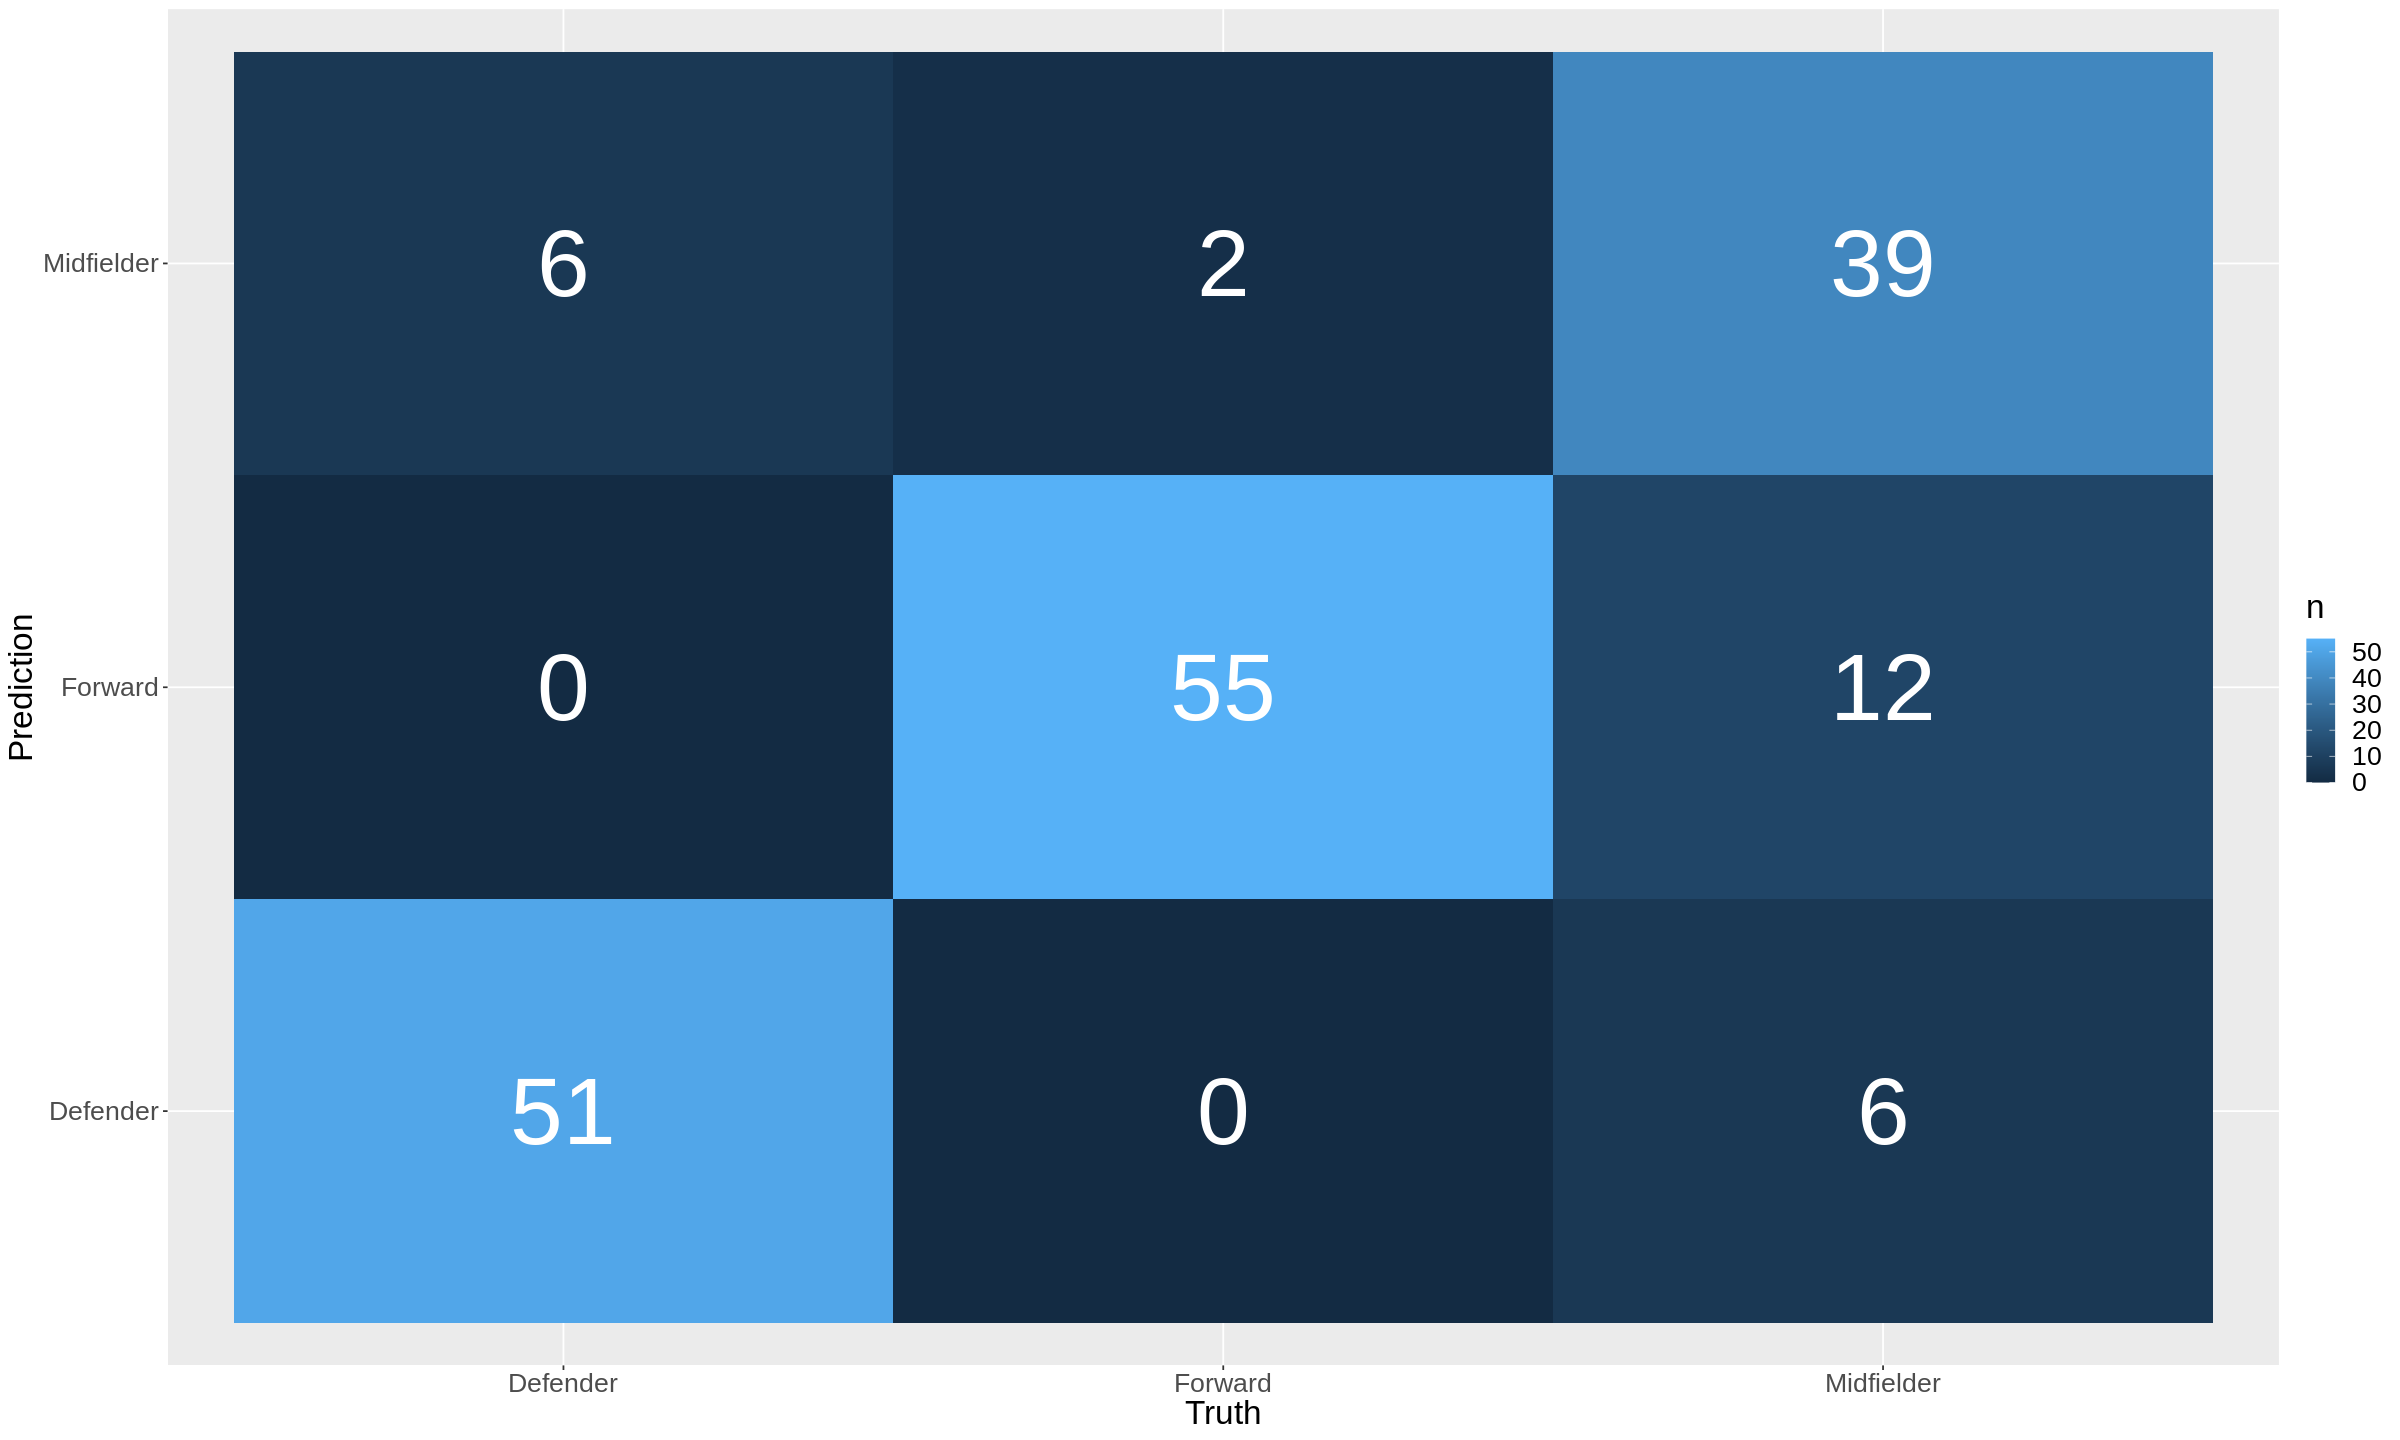

In [19]:
print("Figure 3 : Confusion Matrix Visualization of Our Model")
print("The final visualization of our model confusion matrix")

ggplot(confmat_df, aes(x = Truth, y = Prediction, fill = n)) +
    geom_tile() +
    geom_text(aes(label = n), size = 20, colour = "white") +
    theme(text = element_text(size=20)) 

options(repr.plot.width=20, repr.plot.height=12)

# Discussion

In our project, based on the 2019-2021 Canadian Premier League Center Circle (CPLCC) dataset, we created a prediction model for classifying player positions based on their statistics. We first cleaned the data by removing entries with N/A, players with no minutes played, and goalkeepers in the dataset. Then, we categorized all player positions into three categories: forward, defender and midfielder. Since some variables recorded are redundant, we reduced the number of predictors used in our model to prevent the uncertainty brought by the curse of dimensionality. We found the eight most significant predictors with position ratios greater than 50% and neglected the rest since predictors with ratios lower than 50% are not distinct enough to be of significance. After that, we created a recipe based on the training set and found the optimal number of neighbors to be 1, our K value. Finally, we created the workflow for the testing set and used it to test the testing set. Our model achieved an accuracy of 0.848 (3.s.f)

While this does not seem very high, it was as expected. A possible explanation could be found in the ambiguity of different player positions. For example, an “attacking midfielder” is classified as a midfield position, but the statistics of this position suggest they act more as an attacking player, which is usually played in a forward position. Therefore, our model incorrectly classified “attacking midfielders” as forward rather than midfield. We can see this in our model’s confusion matrix: it incorrectly predicted 12 midfielders as a forward. This suggests that some redefinition of a forward versus a midfielder is needed for future investigations. However, since player positions are ambiguous, this might explain the confusion of our classifier and why we were not expecting a very high accuracy from our model.

Another potential explanation for the lower accuracy is that player positions are not permanent. A player could play multiple roles within a game and throughout the season. This produces data that could confuse our model, mispredicting some players’ positions. Therefore, our model has lower accuracy because some players' statistics include data recorded when they were not playing their allocated position. 

Through these findings, we can help the coach to maximize the player’s performance. Each position has different abilities and technical requirements for players. For example, midfielders need to have a solid passing ability because their primary duty is passing the ball to the forward to create a scoring chance (Thomas & Scott, 2012). For forward, their primary responsibility is to score goals and break the defense. If a player suitable for an attaker position is forced to play as a defender, their disadvantages in defense and interception may lead to poor performance. Therefore, the team should allow players to play their most suitable position to maximize their performance.

Besides that, the coach can also prepare targeted training for each player. Suppose the coach first determines the player’s most suitable position using this classification model. In that case, he can formulate a training plan and conduct targeted training to improve the player’s technical ability to perform better on the field.

Lastly, this can also help the coach do the player selection process. Without a precise and efficient model to predict the player’s position, the chances are high that the coach assigns the player to a position he is not good at, which cannot compensate for the team’s weakness. If a prediction system is available, the team can recruit players that best address the team’s deficits.

Seeing as our model can be reasonably accurate in predicting player positions, this leads us to question what further course of action we can take if we continue our investigation.	Further investigations may look at building a model which distinguishes the difference between forward, midfielder, and defender roles. An updated model might not predict player positions based on our simplified model but instead, predict their original positions. This could have several benefits. For example, our investigation considers left-back and right-back defenders; however, they can play much more aggressively and are further upfield compared to center-backs. 

Another possible investigation might include redefining the categorization of players. Modern sports scientists have found that the historic categorization of players into forward, midfielder, and defender, may not be more helpful. Instead, websites like GuideToFM prefer to categorize players based on different roles, e.g., Playmaker, Anchor, and Segundo Volant. For future investigations, we could build a model to predict players based on these roles to make it more helpful for coaches to assign player positions.

It is also possible to use our classification model on other datasets. The ongoing FIFA World Cup series might be interesting as we can analyze how accurately our model can predict each nation’s player positions and see whether some nations may be incorrectly using their players on the field.

# References

Razali, Nazim, et al. “Predicting Player Position for Talent Identification in Association Football.” IOP Conference Series: Materials Science and Engineering, vol. 226, no. 012, ser. 087, 2017. 087, https://doi.org/10.1088/1757-899x/226/1/012087.

Shahriar, Md. Tanzil, et al. “Player Classification Technique Based on Performance for a Soccer Team Using Machine Learning Algorithms.” 2019 IEEE International Conference on Electrical, Computer and Communication Technologies (ICECCT), Feb. 2019, https://doi.org/10.1109/icecct.2019.8868989. 

The Curse of Dimensionality. Towards data science. Retrieved November 24, 2022, from https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e4https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e9aa1e

Cooper. A, (2019), Canadian Premier League announces new initiative to share stats perform data. Stats Perform. (2019, November 20). Retrieved December 5, 2022, from https://www.statsperform.com/press/canadian-premier-league-announces-new-initiative-to-share-stats-perform-data/

1. Muhammad Fajrin Buyang Daffa
2. Carolina Ricardo
3. Ruoxi Chen 
4. Dominic Leo


Word Counts : "472"